In [1]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from imblearn.over_sampling import RandomOverSampler

warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

flights_jan_2019 = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectFD/data/jan_2019_ontime.csv")
flights_jan_2020 = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectFD/data/jan_2020_ontime.csv")

In [3]:
print(flights_jan_2019.shape)
flights_jan_2019.head()

(583985, 22)


,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,10397,1039707,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,11193,1119302,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,11193,1119302,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,10397,1039707,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,11778,1177801,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN


In [4]:
print(flights_jan_2020.shape)
flights_jan_2020.head()

(607346, 22)


,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,3,EV,20366,EV,N48901,4397,13930,1393007,ORD,11977,1197705,GRB,1003.0,0.0,1000-1059,1117.0,0.0,0.0,0.0,174.0,NaN
1,1,3,EV,20366,EV,N16976,4401,15370,1537002,TUL,13930,1393007,ORD,1027.0,0.0,1000-1059,1216.0,0.0,0.0,0.0,585.0,NaN
2,1,3,EV,20366,EV,N12167,4404,11618,1161802,EWR,15412,1541205,TYS,1848.0,0.0,1800-1859,2120.0,0.0,0.0,0.0,631.0,NaN
3,1,3,EV,20366,EV,N14902,4405,10781,1078105,BTR,12266,1226603,IAH,1846.0,0.0,1800-1859,2004.0,0.0,0.0,0.0,253.0,NaN
4,1,3,EV,20366,EV,N606UX,4407,14524,1452401,RIC,12266,1226603,IAH,1038.0,0.0,1000-1059,1330.0,0.0,0.0,0.0,1157.0,NaN


In [5]:
flights_jan_2019['YEAR'] = 2019
flights_jan_2020['YEAR'] = 2020

print(set(flights_jan_2019.columns) == set(flights_jan_2020.columns))

True


In [6]:
flights = pd.concat([flights_jan_2019, flights_jan_2020])
flights.reset_index(drop=True, inplace=True)
print(flights.shape)

(1191331, 23)


In [7]:
summary = pd.DataFrame({'uniue_vals': flights.nunique(), 'missing_percent': round(flights.isna().sum()*100/flights.count(), 2), 'data_type': flights.dtypes})
summary

,uniue_vals,missing_percent,data_type
DAY_OF_MONTH,31,0.00,int64
DAY_OF_WEEK,7,0.00,int64
OP_UNIQUE_CARRIER,17,0.00,object
OP_CARRIER_AIRLINE_ID,17,0.00,int64
OP_CARRIER,17,0.00,object
TAIL_NUM,5857,0.27,object
OP_CARRIER_FL_NUM,6997,0.00,int64
ORIGIN_AIRPORT_ID,353,0.00,int64
ORIGIN_AIRPORT_SEQ_ID,373,0.00,int64
ORIGIN,353,0.00,object


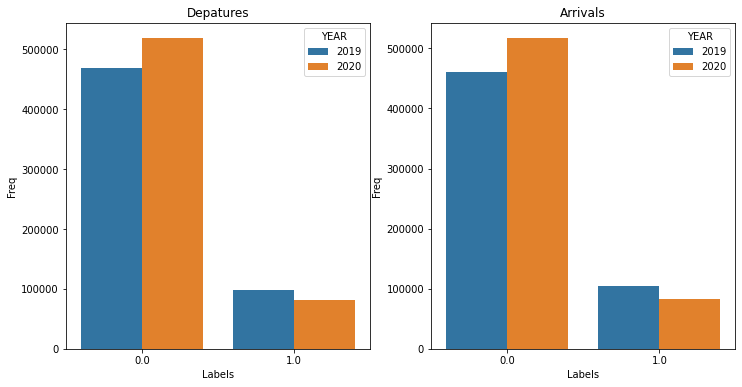

In [8]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12,6))
dep = sns.countplot(x=flights['DEP_DEL15'], hue=flights['YEAR'], ax=ax0)
dep.set_title('Depatures')
dep.set_xlabel('Labels')
dep.set_ylabel('Freq')
arr = sns.countplot(x=flights['ARR_DEL15'], hue=flights['YEAR'], ax=ax1)
arr.set_title('Arrivals')
arr.set_xlabel('Labels')
arr.set_ylabel('Freq')
plt.show()

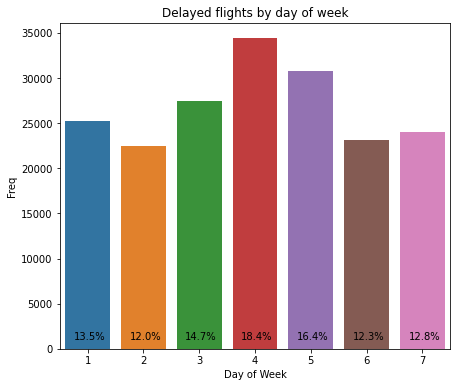

In [9]:
week = flights[['DAY_OF_WEEK', 'ARR_DEL15']].groupby('DAY_OF_WEEK').sum()
week['PERCENT'] = week['ARR_DEL15']/(week['ARR_DEL15'].sum())*100
plt.figure(figsize=(7, 6))
sns.barplot(x=week.index, y=week['ARR_DEL15']).set(title='Delayed flights by day of week', xlabel='Day of Week', ylabel='Freq')
for i, v in enumerate(week['PERCENT']):
    plt.text(week.index[i]-1.25, v+1000, str('{:.1f}%'.format(v)))
plt.show()

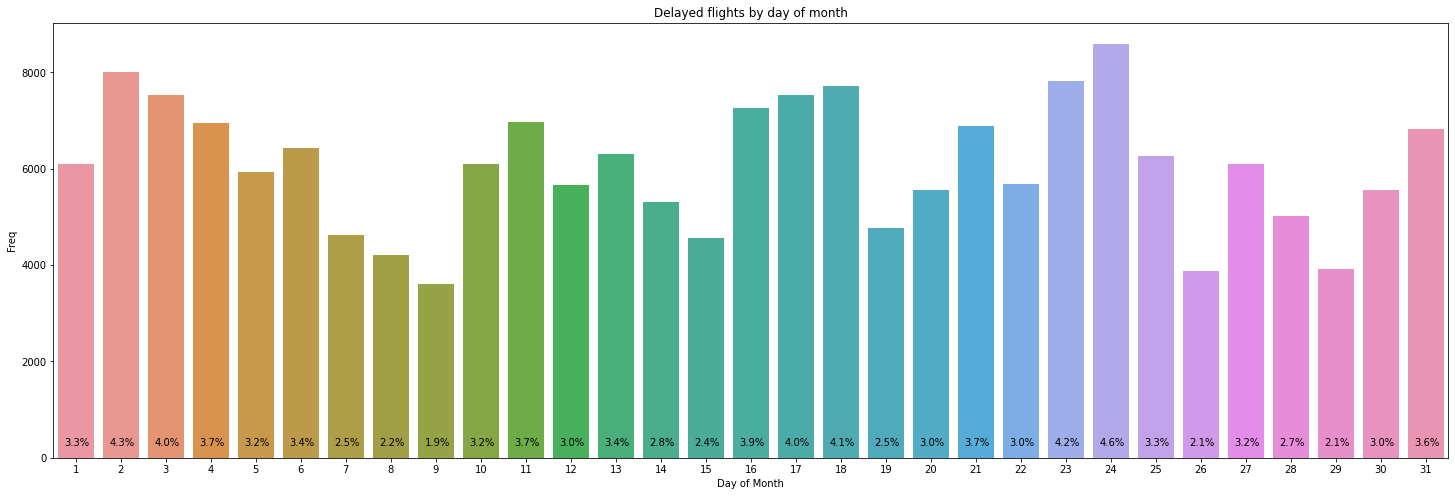

In [10]:
month = flights[['DAY_OF_MONTH', 'ARR_DEL15']].groupby('DAY_OF_MONTH').sum()
month['PERCENT'] = month['ARR_DEL15']/(month['ARR_DEL15'].sum())*100
plt.figure(figsize=(25, 8))
sns.barplot(x=month.index, y=month['ARR_DEL15']).set(title='Delayed flights by day of month', xlabel='Day of Month', ylabel='Freq')
for i, v in enumerate(month['PERCENT']):
    plt.text(month.index[i]-1.25, v+250, str('{:.1f}%'.format(v)))
plt.show()

In [11]:
origin_later = flights[['ORIGIN', 'DEP_DEL15']].groupby('ORIGIN').sum().sort_values(by='DEP_DEL15', ascending=False)
origin_later['PERCENT'] = origin_later['DEP_DEL15']/(origin_later['DEP_DEL15'].sum())*100
origin_later.head()

,DEP_DEL15,PERCENT
ORIGIN,,
ORD,10736.0,5.937692
DFW,8597.0,4.754689
ATL,7784.0,4.305048
DEN,6195.0,3.426230
CLT,5744.0,3.176798


In [12]:
dest_later = flights[['DEST', 'ARR_DEL15']].groupby('DEST').sum().sort_values(by='ARR_DEL15', ascending=False)
dest_later['PERCENT'] = dest_later['ARR_DEL15']/(dest_later['ARR_DEL15'].sum())*100
dest_later.head()

,ARR_DEL15,PERCENT
DEST,,
ORD,10170.0,5.423798
DFW,8667.0,4.622227
ATL,7263.0,3.873455
LGA,7077.0,3.774259
SFO,6114.0,3.260678


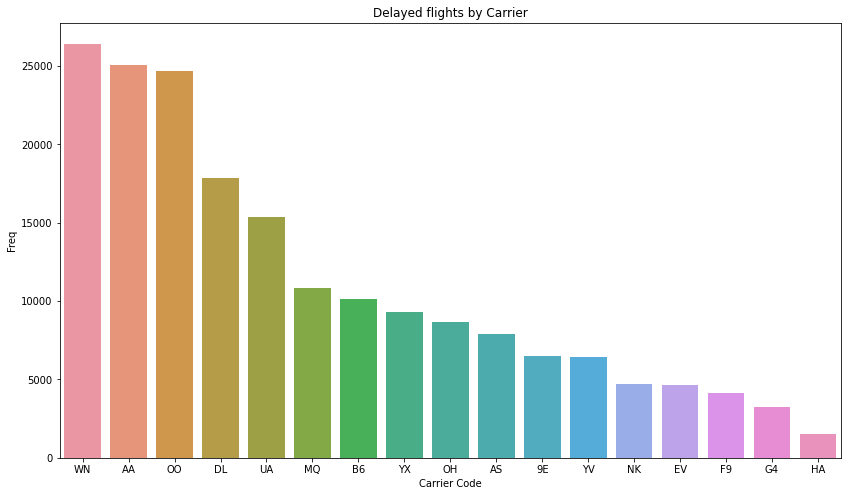

In [13]:
carrier = flights[['OP_UNIQUE_CARRIER', 'ARR_DEL15']].groupby('OP_UNIQUE_CARRIER').sum().sort_values(by='ARR_DEL15', ascending=False)
plt.figure(figsize=(14, 8))
sns.barplot(x=carrier.index, y=carrier['ARR_DEL15']).set(title='Delayed flights by Carrier', xlabel='Carrier Code', ylabel='Freq')
plt.show()

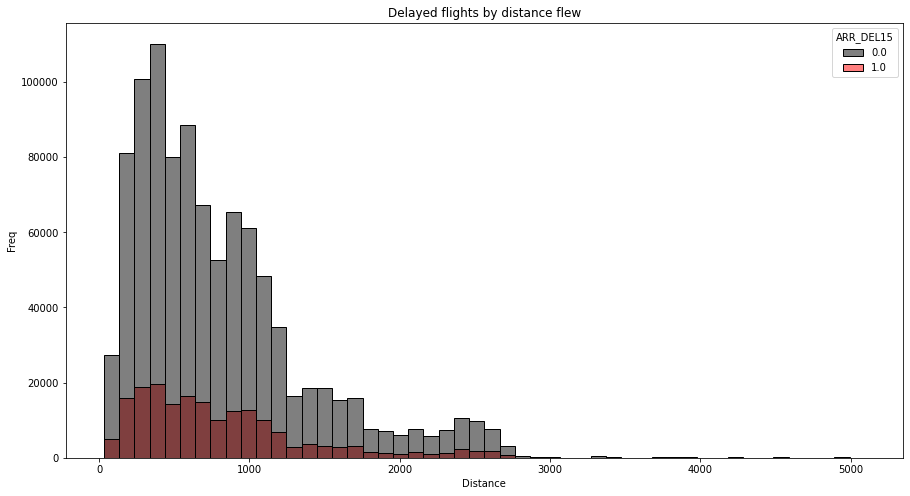

In [14]:
plt.figure(figsize=(15, 8))
sns.histplot(x=flights['DISTANCE'], hue=flights['ARR_DEL15'], bins=50, palette=["k", "r"]).set(title='Delayed flights by distance flew', xlabel='Distance', ylabel='Freq')
plt.show()

In [15]:
# NaN count in delayed arrivals
flights['ARR_DEL15'].isnull().sum() == flights['CANCELLED'].sum() + flights['DIVERTED'].sum()

True

In [16]:
# It seems target values are set to NaN, which flights cancelled and diverted. So for those, we assume that it arrived in late
flights.loc[flights['CANCELLED'] == 1, 'ARR_DEL15'] = 1
flights.loc[flights['DIVERTED'] == 1, 'ARR_DEL15'] = 1
flights.drop(columns=['CANCELLED', 'DIVERTED'], inplace=True)

# Since 'Unnamed: 21' column dose not carry any date, drop that column
flights.drop(columns=['Unnamed: 21'], inplace=True)

# Since all other missing values are less that 3% and the dataset is quite big, drop flights with missing data
flights = flights.dropna()
flights.reset_index(drop=True)

print(flights.shape)
flights.isnull().sum()

(1167195, 20)


DAY_OF_MONTH             0
DAY_OF_WEEK              0
OP_UNIQUE_CARRIER        0
OP_CARRIER_AIRLINE_ID    0
OP_CARRIER               0
TAIL_NUM                 0
OP_CARRIER_FL_NUM        0
ORIGIN_AIRPORT_ID        0
ORIGIN_AIRPORT_SEQ_ID    0
ORIGIN                   0
DEST_AIRPORT_ID          0
DEST_AIRPORT_SEQ_ID      0
DEST                     0
DEP_TIME                 0
DEP_DEL15                0
DEP_TIME_BLK             0
ARR_TIME                 0
ARR_DEL15                0
DISTANCE                 0
YEAR                     0
dtype: int64

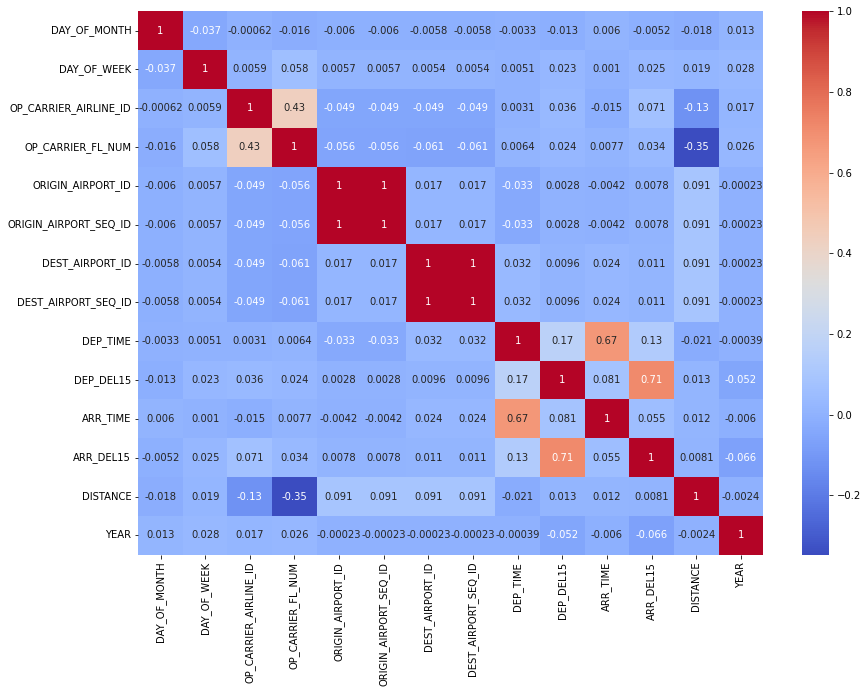

In [17]:
plt.figure(figsize = (14, 10))
sns.heatmap(flights.corr(), annot = True, cmap = 'coolwarm')
plt.show()

In [18]:
flights[['DEP_TIME', 'DEP_TIME_BLK']]

,DEP_TIME,DEP_TIME_BLK
0,601.0,0600-0659
1,1359.0,1400-1459
2,1215.0,1200-1259
3,1521.0,1500-1559
4,1847.0,1900-1959
...,...,...
1191326,1002.0,0700-0759
1191327,1747.0,1700-1759
1191328,554.0,0600-0659
1191329,1714.0,1700-1759


In [19]:
# It seems some of the time blocks are incorrect and it has one block for 0001-0559. Therefore, recreating time blocks for departures and creating time blocks for arrivals
blocks = []
for hour in range(0,24):
    hour_part = ('%02d' %(hour))
    blocks.append(hour_part + '00-' + hour_part + '59')

def get_time_blk(time):
    hour = str('%04d' %(time))[:2]
    time_block = None
    for block in blocks:
        if block.startswith(hour):
            time_block = block
            break
    if time_block == None and str(time) == '2400.0':
        time_block = '0000-0059'
    return time_block

flights['ARR_TIME_BLK'] = flights.ARR_TIME.apply(get_time_blk)
flights['DEP_TIME_BLK'] = flights.DEP_TIME.apply(get_time_blk)

In [20]:
# Rechecking the accuracy of time and time block columns
flights[['DEP_TIME', 'DEP_TIME_BLK', 'ARR_TIME', 'ARR_TIME_BLK']]

,DEP_TIME,DEP_TIME_BLK,ARR_TIME,ARR_TIME_BLK
0,601.0,0600-0659,722.0,0700-0759
1,1359.0,1300-1359,1633.0,1600-1659
2,1215.0,1200-1259,1329.0,1300-1359
3,1521.0,1500-1559,1625.0,1600-1659
4,1847.0,1800-1859,1940.0,1900-1959
...,...,...,...,...
1191326,1002.0,1000-1059,1128.0,1100-1159
1191327,1747.0,1700-1759,1933.0,1900-1959
1191328,554.0,0500-0559,752.0,0700-0759
1191329,1714.0,1700-1759,1811.0,1800-1859


In [21]:
# Dropping DEP_TIME and ARR_TIME, since TIME and TIME_BLK columns will strongly correlated each other
flights.drop(columns=['DEP_TIME', 'ARR_TIME'], inplace=True)

In [22]:
(flights['OP_UNIQUE_CARRIER'] == flights['OP_CARRIER']).value_counts()

True    1167195
dtype: int64

In [23]:
# Dropping OP_CARRIER, since OP_UNIQUE_CARRIER and OP_CARRIER columns are same
flights.drop(columns = ['OP_CARRIER', 'OP_CARRIER_AIRLINE_ID'], inplace=True)

In [24]:
flights['ORIGIN_AIRPORT_SEQ_ID'] = flights['ORIGIN_AIRPORT_SEQ_ID'].apply(str)
flights['ORIGIN_SEQ_ID'] = flights['ORIGIN_AIRPORT_SEQ_ID'].str[-2:]

flights['DEST_AIRPORT_SEQ_ID'] = flights['DEST_AIRPORT_SEQ_ID'].apply(str)
flights['DEST_SEQ_ID'] = flights['DEST_AIRPORT_SEQ_ID'].str[-2:]

flights.drop(columns=['ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID'], inplace=True)

In [25]:
cat_var = flights.columns.values.tolist()
cat_var.remove('DISTANCE')
for col in cat_var:
    flights[col] = flights[col].astype('category')

flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1167195 entries, 0 to 1191330
Data columns (total 15 columns):
 #   Column             Non-Null Count    Dtype   
---  ------             --------------    -----   
 0   DAY_OF_MONTH       1167195 non-null  category
 1   DAY_OF_WEEK        1167195 non-null  category
 2   OP_UNIQUE_CARRIER  1167195 non-null  category
 3   TAIL_NUM           1167195 non-null  category
 4   OP_CARRIER_FL_NUM  1167195 non-null  category
 5   ORIGIN             1167195 non-null  category
 6   DEST               1167195 non-null  category
 7   DEP_DEL15          1167195 non-null  category
 8   DEP_TIME_BLK       1167195 non-null  category
 9   ARR_DEL15          1167195 non-null  category
 10  DISTANCE           1167195 non-null  float64 
 11  YEAR               1167195 non-null  category
 12  ARR_TIME_BLK       1167195 non-null  category
 13  ORIGIN_SEQ_ID      1167195 non-null  category
 14  DEST_SEQ_ID        1167195 non-null  category
dtypes: category(14)

In [26]:
# Random undersampling of whole dataset
flights_us = flights.sample(frac=0.1, random_state=42, ignore_index=True)
print('Whole dataset: ', flights.shape)
print('Reduced dataset: ', flights_us.shape)

Whole dataset:  (1167195, 15)
Reduced dataset:  (116720, 15)


In [27]:
# Generating feature matrix and target vector
flights_X = flights_us.drop(columns=['ARR_DEL15'])
flights_y = flights_us['ARR_DEL15']
print(flights_X.shape)
print(flights_y.shape)

(116720, 14)
(116720,)


In [28]:
le = LabelEncoder()
cat_var.remove('ARR_DEL15')
for col in cat_var:
    flights_X[col] = le.fit_transform(flights_X[[col]])

flights_X.head() 

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,DEP_DEL15,DEP_TIME_BLK,DISTANCE,YEAR,ARR_TIME_BLK,ORIGIN_SEQ_ID,DEST_SEQ_ID
0,10,4,1,4272,2387,214,204,0,19,192.0,0,20,2,1
1,19,6,13,2014,248,156,158,0,17,1190.0,0,19,1,2
2,8,2,1,3192,2048,70,89,0,7,331.0,0,9,2,4
3,17,4,14,4320,1565,232,180,0,19,407.0,0,20,7,2
4,17,4,11,2568,5380,70,82,0,15,335.0,0,16,2,1


In [29]:
lb = LabelBinarizer()
flights_y = lb.fit_transform(flights_y).reshape((-1,))

In [30]:
# Splitting the data into train and test datasets (70% & 30%)
X_train, X_test, y_train, y_test = train_test_split(flights_X, flights_y, test_size=0.3, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(81704, 14) (81704,)
(35016, 14) (35016,)


In [31]:
# Since the dataset is imbalanced, let's use RandomOverSampler method to generate more examples of class 1
ros = RandomOverSampler(sampling_strategy='minority', random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)
for dataset in [X_train_ros, y_train_ros, X_test, y_test]:
    print(dataset.shape)

(136620, 14)
(136620,)
(35016, 14)
(35016,)


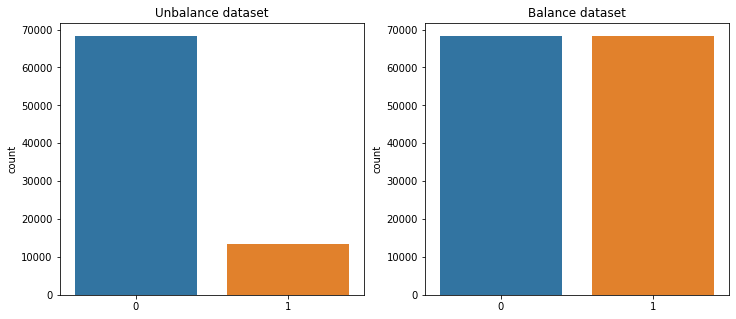

In [32]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12,5))
unbal = sns.countplot(x=y_train, ax=ax0).set(title='Unbalance dataset')
bal = sns.countplot(x=y_train_ros, ax=ax1).set(title='Balance dataset')
plt.show()

In [33]:
# Instantiate the machine learning classifiers
log = LogisticRegression(max_iter=1000, n_jobs=-1, random_state=42)
sgd = SGDClassifier(max_iter=1000, n_jobs=-1, random_state=42)
dtc = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
svc = SVC(random_state=42)
gbc = GradientBoostingClassifier(random_state=42)
xgb = XGBClassifier(n_jobs=-1, random_state=42)

table_index = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Initail model evaluation
initial_models = [log, sgd, dtc, rfc, svc, gbc, xgb]
initial_model_scores = {}

def initial_model_eval(X, y):
    for model in initial_models:
        model.fit(X, y)
        y_pred = model.predict(X)
        initial_model_scores[type(model).__name__] = [accuracy_score(y, y_pred), precision_score(y, y_pred), recall_score(y, y_pred), f1_score(y, y_pred)]
    initial_table = pd.DataFrame(initial_model_scores, index=table_index)
    initial_table['BestScore'] = initial_table.idxmax(axis=1)
    return initial_table

initial_model_eval(X_train_ros, y_train_ros)

,LogisticRegression,SGDClassifier,DecisionTreeClassifier,RandomForestClassifier,SVC,GradientBoostingClassifier,XGBClassifier,BestScore
Accuracy,0.848492,0.726585,1.0,1.0,0.535075,0.849729,0.913058,DecisionTreeClassifier
Precision,0.945271,0.687000,1.0,1.0,0.535714,0.945244,0.943955,DecisionTreeClassifier
Recall,0.739818,0.832426,1.0,1.0,0.526131,0.742468,0.878261,DecisionTreeClassifier
F1 Score,0.830020,0.752754,1.0,1.0,0.530879,0.831674,0.909924,DecisionTreeClassifier


In [34]:
# Define dictionary with performance metrics
scoring = {'accuracy':make_scorer(accuracy_score), 'precision':make_scorer(precision_score), 'recall':make_scorer(recall_score), 'f1_score':make_scorer(f1_score)}

# Cross validate model evaluation
cv_models = [log, sgd, dtc, rfc, svc, gbc, xgb]
cv_model_scores = {}

def cv_model_eval(X, y, folds):
    for model in cv_models:
        scores = cross_validate(model, X, y, cv=folds, scoring=scoring, n_jobs=-1)
        cv_model_scores[type(model).__name__] = [scores['test_accuracy'].mean(), scores['test_precision'].mean(), scores['test_recall'].mean(), scores['test_f1_score'].mean()]
    cv_table = pd.DataFrame(cv_model_scores, index=table_index)
    cv_table['BestScore'] = cv_table.idxmax(axis=1)
    return cv_table

cv_model_eval(X_train_ros, y_train_ros, 5)

,LogisticRegression,SGDClassifier,DecisionTreeClassifier,RandomForestClassifier,SVC,GradientBoostingClassifier,XGBClassifier,BestScore
Accuracy,0.848624,0.619829,0.952686,0.977631,0.533970,0.849744,0.899275,RandomForestClassifier
Precision,0.945862,0.723838,0.914519,0.958026,0.534492,0.945067,0.933198,RandomForestClassifier
Recall,0.739584,0.613570,0.998726,0.999034,0.526702,0.742658,0.860123,RandomForestClassifier
F1 Score,0.830093,0.557094,0.954768,0.978099,0.530529,0.831720,0.895168,RandomForestClassifier


In [35]:
# Hyperparameter tuning with grid search cross validation
parameters = {'n_estimators': [100, 200, 500],
              'max_depth': [20, 40, 60],
              'max_features': [2, 3]}

gs_rfc = GridSearchCV(estimator=rfc, param_grid=parameters, cv=3, n_jobs=-1, verbose=2)
gs_rfc.fit(X_train_ros, y_train_ros)
gs_rfc.best_params_

Fitting 3 folds for each of 18 candidates, totalling 54 fits


{'max_depth': 60, 'max_features': 2, 'n_estimators': 100}

In [36]:
best_rfc = gs_rfc.best_estimator_
best_pred_tr = best_rfc.predict(X_train_ros)
print('Classification report on training set')
print(classification_report(y_train_ros, best_pred_tr))

Classification report on training set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     68310
           1       1.00      1.00      1.00     68310

    accuracy                           1.00    136620
   macro avg       1.00      1.00      1.00    136620
weighted avg       1.00      1.00      1.00    136620



In [37]:
best_pred_te = best_rfc.predict(X_test)
print('Classification report on testing set')
print(classification_report(y_test, best_pred_te))

Classification report on testing set
              precision    recall  f1-score   support

           0       0.95      0.96      0.95     29304
           1       0.78      0.74      0.76      5712

    accuracy                           0.92     35016
   macro avg       0.87      0.85      0.86     35016
weighted avg       0.92      0.92      0.92     35016



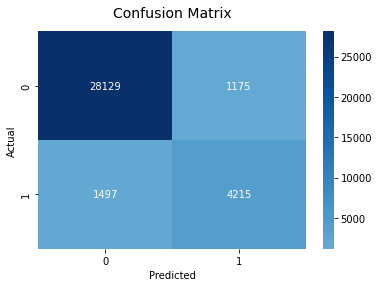

In [38]:
con_mat = confusion_matrix(y_test, best_pred_te)
con = sns.heatmap(con_mat, center=True, annot=True, cmap='Blues', fmt='g')
con.set_title('Confusion Matrix', fontdict={'fontsize':14}, pad=14)
con.set_ylabel('Actual')
con.set_xlabel('Predicted')
plt.show()

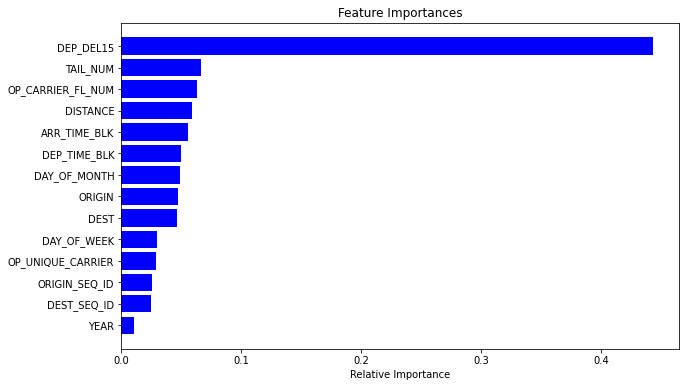

In [39]:
features = X_train.columns
importances = best_rfc.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()